In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel(image, threshold_value, kernel_size):
    """
    Функция Sobel для обнаружения границ в изображении с помощью оператора Собеля и морфологических преобразований.

    Args:
        image (numpy.ndarray): Входное цветное или grayscale изображение.
        threshold_value (int): Значение порога для бинаризационного порцесса.
        kernel_size (tuple): Размер ядра для морфологического закрытия.

    Returns:
        numpy.ndarray: Изображение с обнаруженными границами после применения оператора Собеля и морфологических преобразований.

    Process:
        1. Преобразование входного изображения в оттенки серого, если оно цветное.
        2. Вычисление горизонтальной и вертикальной градиентных карт с помощью операторов Собеля.
        3. Вычисление магнитуды градиента.
        4. Масштабирование результатов и применение порогового значения для создания бинарного изображения.
        5. Создание ядра единиц и применение морфологического закрытия для очистки изображения от шумов.
    """

    # Преобразование входного изображения в оттенки серого, если оно цветное
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Вычисление горизонтальной градиентной карты
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size[0])

    # Вычисление вертикальной градиентной карты
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size[0])

    # Вычисление магнитуды градиента
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)

    # Масштабирование результатов и применение порогового значения для создания бинарного изображения
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    _, binary_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

    # Создание ядра единиц и применение морфологического закрытия для очистки изображения от шумов
    kernel = np.ones(kernel_size[1:], np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return cleaned_image



def local_contrast(image_path, window_size):
    """
    Функция для расчета локального контраста в изображении с использованием дилатации и эрозии.

    Args:
        image_path (str): Путь к входному изображению.
        window_size (int): Размер окна для морфологических операций.

    Returns:
        numpy.ndarray: Изображение с рассчитанным локальным контрастом.

    Process:
        1. Загрузка входного изображения в оттенках серый.
        2. Преобразование изображения в тип float32 для дальнейших вычислений.
        3. Создание ядра единиц заданного размера.
        4. Применение дилатации для определения максимальной интенсивности.
        5. Применение эрозии для определения минимальной интенсивности.
        6. Вычисление разницы между максимальной и минимальной интенсивностями.
        7. Нормализация результата и приведение к типу uint8.
    """

    # Загрузка изображения в оттенках серый
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Преобразование изображения в тип float32
    image_float = image.astype(np.float32)

    # Создание ядра единиц заданного размера
    kernel = np.ones((window_size, window_size), dtype=np.uint8)

    # Применение дилатации для определения максимальной интенсивности
    max_intensity = cv2.dilate(image_float, kernel)

    # Применение эрозии для определения минимальной интенсивности
    min_intensity = cv2.erode(image_float, kernel)

    # Вычисление локального контраста
    contrast_map = max_intensity - min_intensity

    # Нормализация результата и приведение к типу uint8
    contrast_map_normalized = cv2.normalize(contrast_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return contrast_map_normalized




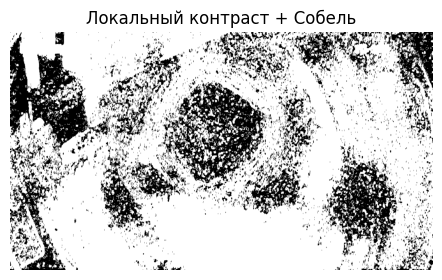

In [5]:
# Рассчитываем локальный контраст и оператор собеля
image = sobel(local_contrast('/Users/solyanikvarvara/Desktop/хак2/misis_chill/new_photos/cv_open_dataset/open_img/1710264471_0.jpg', window_size=5), threshold_value=100, kernel_size=(5, 5))

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Собель
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Локальный контраст + Собель')
plt.axis('off')

plt.show()

собель + делатион

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel(image, threshold_value, kernel_size):
    """
    Функция для обнаружения границ в изображении с помощью оператора Собеля и морфологических преобразований.

    Args:
        image (str): Путь к входному изображению.
        threshold_value (int): Значение порога для бинаризационного порцесса.
        kernel_size (tuple): Размер ядра для морфологического закрытия.

    Returns:
        numpy.ndarray: Изображение с обнаруженными границами после применения оператора Собеля и морфологических преобразований.

    Process:
        1. Загрузка входного изображения в оттенках серый.
        2. Вычисление горизонтальной и вертикальной градиентных карт с помощью операторов Собеля.
        3. Вычисление магнитуды градиента.
        4. Масштабирование результатов и применение порогового значения для создания бинарного изображения.
        5. Создание ядра единиц и применение морфологического закрытия для очистки изображения от шумов.
    """

    # Загрузка изображения в оттенках серый
    gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Вычисление горизонтальной градиентной карты
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size[0])

    # Вычисление вертикальной градиентной карты
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size[0])

    # Вычисление магнитуды градиента
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)

    # Масштабирование результатов и применение порогового значения для создания бинарного изображения
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)
    _, binary_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

    # Создание ядра единиц и применение морфологического закрытия для очистки изображения от шумов
    kernel = np.ones(kernel_size, np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return cleaned_image

def dilation(img, dilation_iterations):
    """
    Функция для применения операции дилатации к изображению с использованием ядра единиц.

    Args:
        img (numpy.ndarray): Входное изображение в формате numpy.array.
        dilation_iterations (int): Количество итераций дилатации.

    Returns:
        numpy.ndarray: Изображение после применения операции дилатации.

    Process:
        1. Создание ядра единиц заданного размера (5x5).
        2. Применение операции дилатации к входному изображению.
        3. Повторение операции указанное количество итераций.
    """

    # Создание матрицы ядра из единиц, размером 5x5
    kernel = np.ones((5, 5), np.uint8) 
  
    # Применение дилатации к изображению
    # iterations определяет количество повторений операции
    img_dilation = cv2.dilate(img, kernel, iterations=dilation_iterations) 
  
    return img_dilation



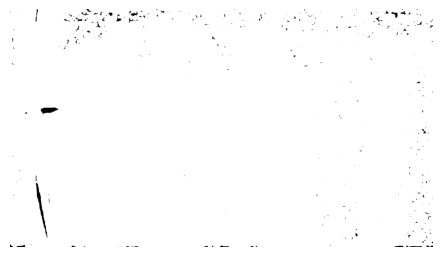

In [21]:
im = dilation(sobel('/Users/solyanikvarvara/Desktop/хак2/misis_chill/new_photos/cv_open_dataset/open_img/1717059450_0.jpg', threshold_value=100, kernel_size=(5, 5)),dilation_iterations=2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

контраст + дилатион

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

 
def local_contrast(image_path, window_size):
    """
    Функция для расчета локального контраста в изображении с использованием операций дилатации и эрозии.

    Args:
        image_path (str): Путь к входному изображению.
        window_size (int): Размер окна для морфологических операций.

    Returns:
        numpy.ndarray: Изображение с рассчитанным локальным контрастом.

    Process:
        1. Загрузка входного изображения в оттенках серых.
        2. Преобразование изображения в тип float32 для дальнейших вычислений.
        3. Создание ядра единиц заданного размера.
        4. Применение дилатации для определения максимальной интенсивности.
        5. Применение эрозии для определения минимальной интенсивности.
        6. Вычисление разницы между максимальной и минимальной интенсивностями.
        7. Нормализация результата и приведение к типу uint8.
    """

    # Загрузка изображения в оттенках серых
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Преобразование изображения в тип float32
    image_float = image.astype(np.float32)

    # Создание ядра единиц заданного размера
    kernel = np.ones((window_size, window_size), dtype=np.uint8)

    # Применение дилатации для определения максимальной интенсивности
    max_intensity = cv2.dilate(image_float, kernel)

    # Применение эрозии для определения минимальной интенсивности
    min_intensity = cv2.erode(image_float, kernel)

    # Локальный контраст как разница между максимальной и минимальной яркостью
    contrast_map = max_intensity - min_intensity

    # Нормализация результата и приведение к типу uint8
    contrast_map_normalized = cv2.normalize(contrast_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return contrast_map_normalized


def dilation(img, dilation_iterations):
    """
    Функция для применения операции дилатации к изображению с использованием ядра единиц.

    Args:
        img (numpy.ndarray): Входное изображение в формате numpy.array.
        dilation_iterations (int): Количество итераций дилатации.

    Returns:
        numpy.ndarray: Изображение после применения операции дилатации.

    Process:
        1. Создание ядра из единиц заданного размера (по умолчанию 5x5).
        2. Применение операции дилатации к входному изображению.
        3. Повторение операции указанное количество итераций.
    """

    # Создание матрицы ядра из единиц, размером 5x5
    kernel = np.ones((5, 5), np.uint8) 
  
    # Применение дилатации к изображению
    # iterations определяет количество повторений операции
    img_dilation = cv2.dilate(img, kernel, iterations=dilation_iterations) 
  
    return img_dilation



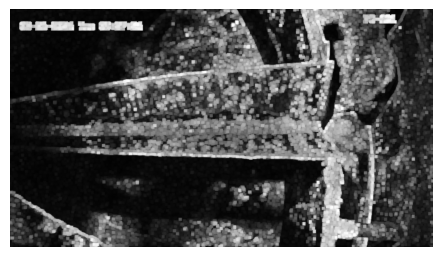

In [19]:
im = dilation(local_contrast('/Users/solyanikvarvara/Desktop/хак2/misis_chill/new_photos/cv_open_dataset/open_img/1711412853_0.jpg', window_size=5), dilation_iterations=2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.axis('off')

plt.show()